# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach: 
1. Problem definition 
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation

## 1. Problem Definition 
In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease? 

## 2. Data 
The original data came from the Cleveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease 

There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data 

## 3. Evaluation 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features 

This is where you'll get different information about each of the features in your data. 

**Create data dictionary**

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

## Preparing the tools 

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# we want our plots to appear inside the notebook 
%matplotlib inline 

# Models from Scikit-learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data 

In [2]:
df = pd.read_csv('misc/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with. 

1. What question(s) are you trying to solve? 
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them? 
5. How can you add, change or remove features to get more out of your data? 

In [3]:
# find out how many class are there in the target
df['target'].value_counts() 

target
1    165
0    138
Name: count, dtype: int64

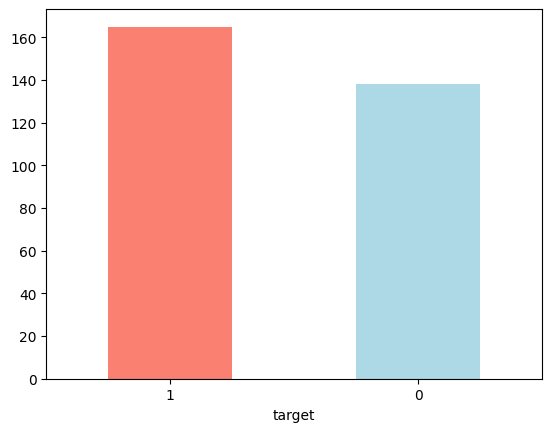

In [4]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);
plt.xticks(rotation=0);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Are there any missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# descriptive statistics 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


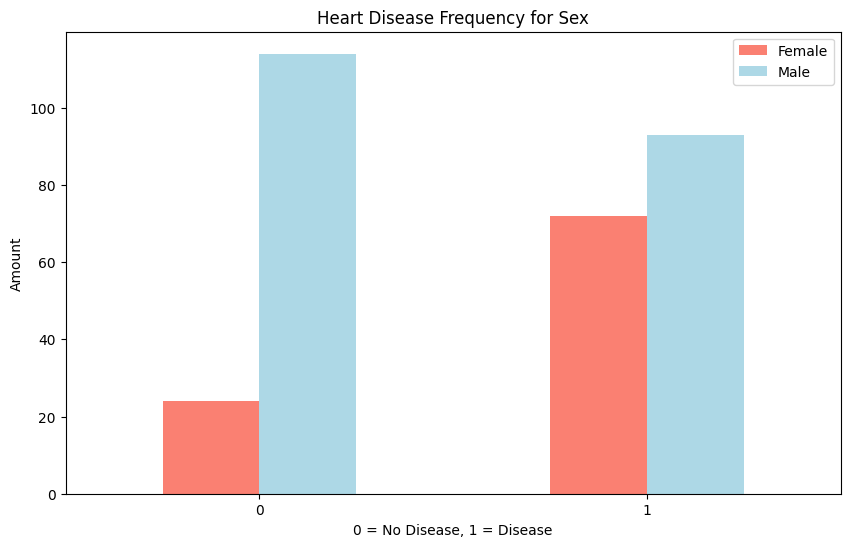

In [8]:
# Create a plot of crosstab 
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [9]:
df['thalach'].value_counts() 

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease 

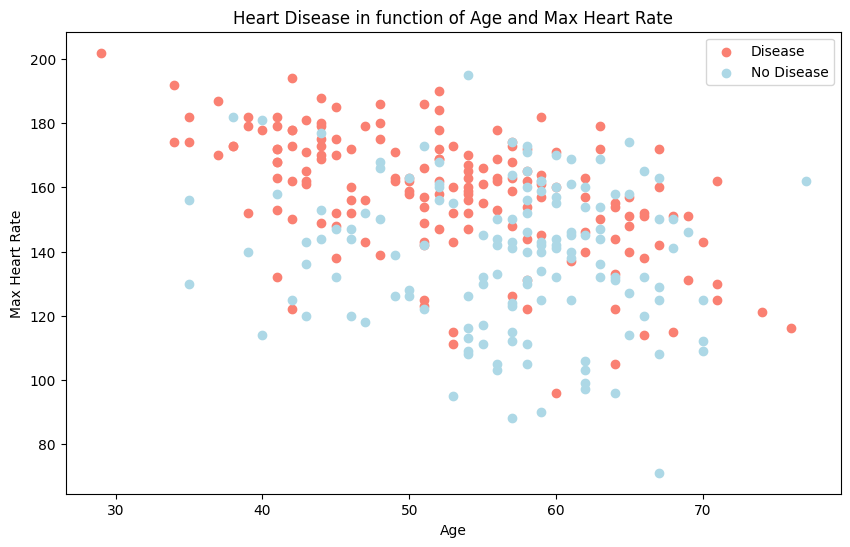

In [10]:
# Create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatter with negative examples 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

# Add some helpful info 
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

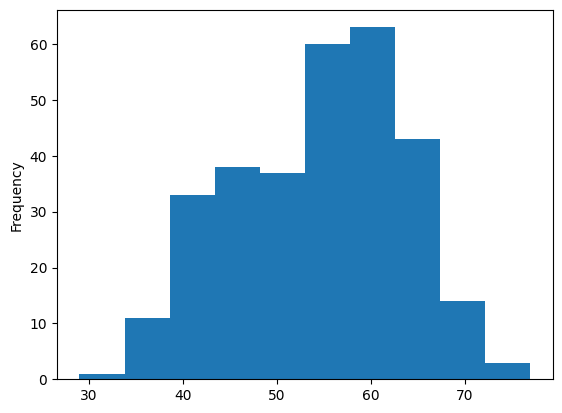

In [11]:
# Check the distribution of the column with a histogram 
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type 
 cp chest pain type 
 
0. Typical angina: chest pain related decrease blood supply to the heart 
1. Atypical angina: chest pain not related to heart 
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [12]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


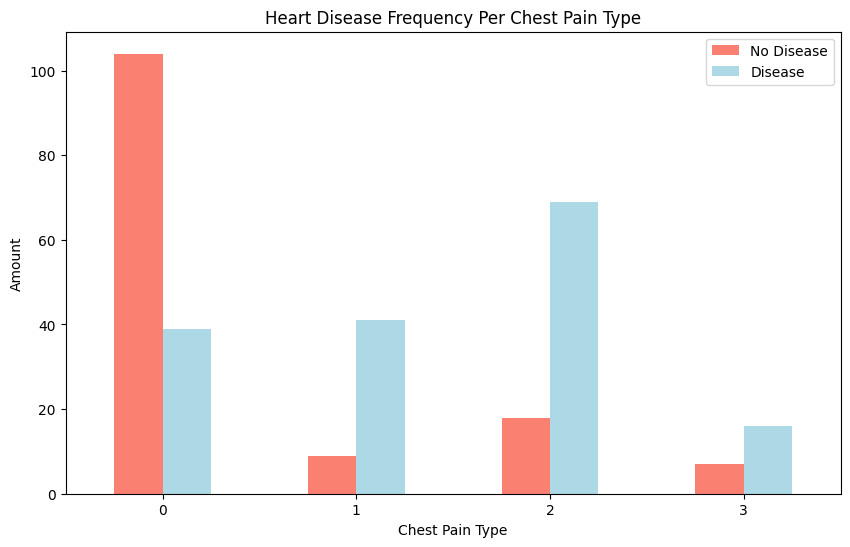

In [13]:
# Make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue'])

# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# We make a correlation to observe the relationship that exist between the various variables 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


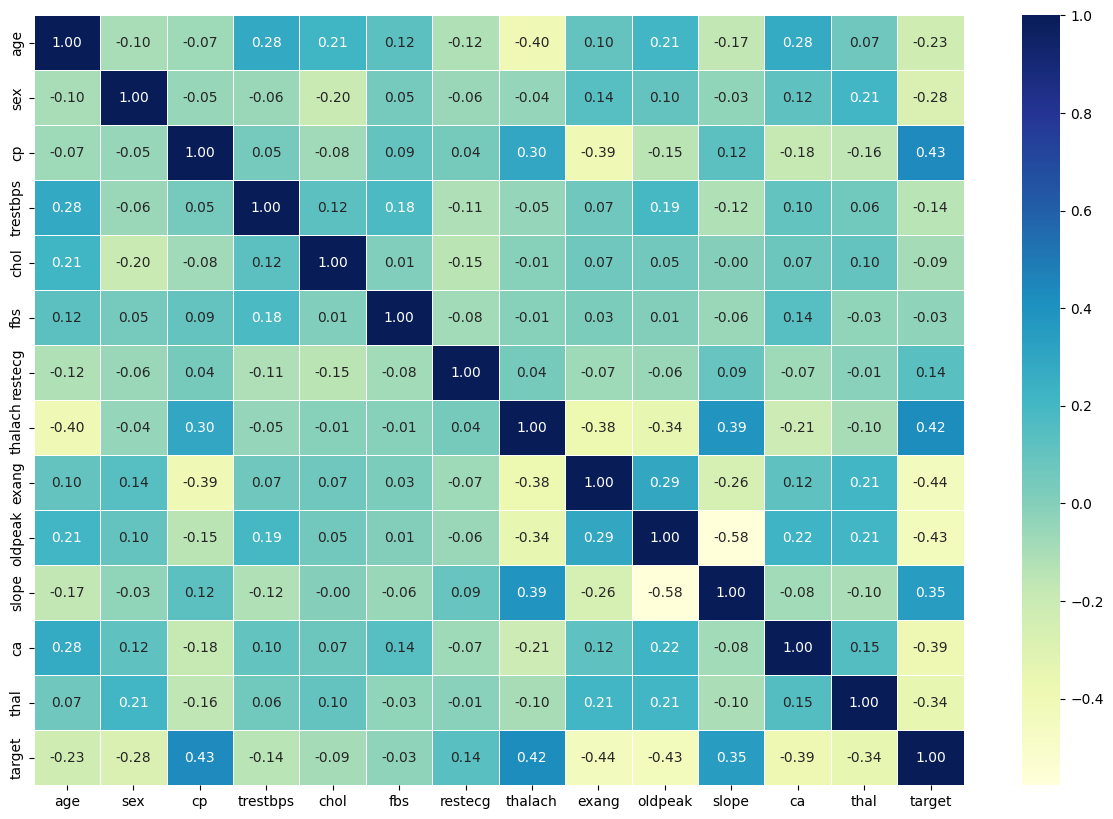

In [16]:
# Make a plot of the correlation to get better understanding 
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, 
                annot=True,
                linewidths=.5,
                fmt='.2f',
                cmap='YlGnBu');

## 5. Modelling 

In [17]:
# Split data into X and y 

X = df.drop('target', axis=1)
y = df['target']

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Create training and test datasets 
np.random.seed(22)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [21]:
X_train.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3


In [22]:
y_train.head()

158    1
46     1
131    1
172    0
71     1
Name: target, dtype: int64

- Now we've got our data split into training and test sets. It's time to build a machine learning model. 
- We'll train it (find the patterns) on the training set. 
- And we'll test it (use the patterns) on the test set. 
    1. Logistic Regression 
    2. K-Nearest Neighbours Classifier 
    3. Random Forest Classifier

In [23]:
# Put models in a dictionary 
models = {'Logistic Regression': LogisticRegression(max_iter=1500),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels 
    y_test: test labels
    '''
    # Set random seed 
    np.random.seed(42) 
    # Make a dictionary to keep model scores 
    model_scores = {} 
    # Loop through models 
    for name, model in models.items(): 
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores 

In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [25]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7868852459016393}

## Model Comparison 

<Axes: >

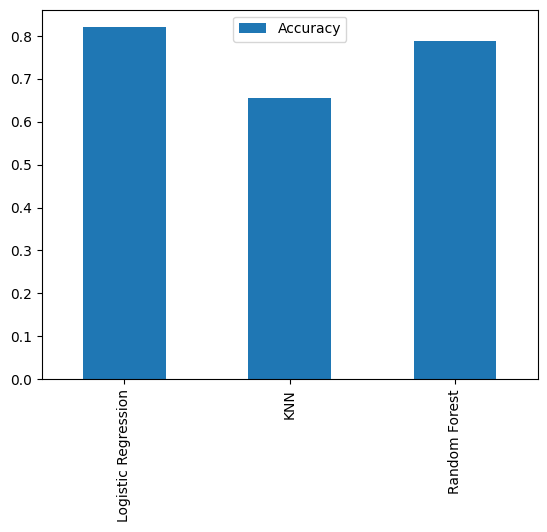

In [26]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy']) 
model_compare.T.plot(kind='bar')

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do? 

Let's look at the following:

- Hyperparameter tuning 
- Feature importance 
- Confusion matrix 
- Cross-validation 
- Precision 
- Recall 
- F1 score 
- Classification report 
- ROC curve 
- Area under the curve (AUC) 

## Hyperparameter tuning (By Hand)

In [27]:
# Let's tune KNN 
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors 
neighbors = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier() 

# Loop through different n_neighbors 
for i in neighbors: 
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list 
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [28]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

In [29]:
test_scores 

[0.5573770491803278,
 0.5737704918032787,
 0.639344262295082,
 0.5737704918032787,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.5409836065573771,
 0.5737704918032787,
 0.5573770491803278,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.6229508196721312]

Maximum KNN score on the test data: 65.57%


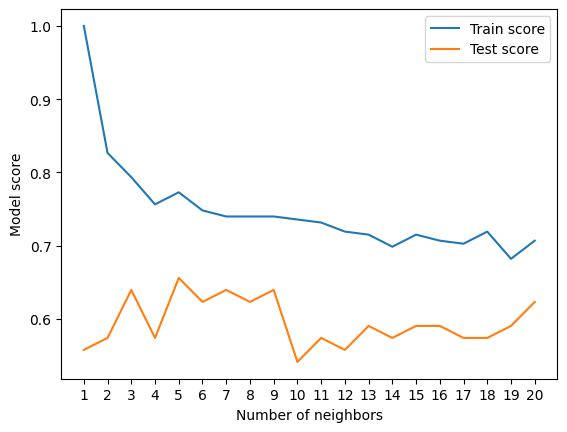

In [30]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend() 

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyper-parameter tuning with RandomizedSearchCV

We're going to tune: 

- LogisticRegression()
- RandomForestClassifier() 

... using RandomizedSearchCV

In [31]:
# Create a hyperparameter grid for LogisticRegression 
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier 
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [32]:
# Tune LogisticRegression 

np.random.seed(12)

# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid, 
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(11.288378916846883)}

In [34]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [35]:
model_scores 

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7868852459016393}

## Hyperparameter Tuning with GridSearchCV 

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [38]:
# Different hyperparameters for our LogisticRegression model 
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, y_train);

# Setup

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [39]:
gs_log_reg.best_params_ 

{'C': np.float64(9.236708571873866), 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

## Evaluating our tuned machine learning classifier, beyond accuracy 

- ROC curve and AUC score 
- Confusion matrix 
- Classification report 
- Precision 
- Recall 
- F1-score 

... and it would be great if cross-validation was used where possible. 

To make comparison and evaluate our trained model, first we need to make predictions.

In [41]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

### Get latest version of sklearn ROC curve method

In [42]:
# Plot ROC curve and calculate AUC metric 
plot_roc_curve(gs_log_reg, X_test, y_test)

NameError: name 'plot_roc_curve' is not defined

In [46]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[21  6]
 [ 5 29]]


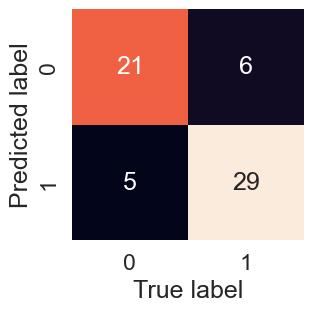

In [48]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    ''' 
    Plots a nice looking confusion matrix Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Calculate evaluation metrics using cross-validation 

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [50]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': np.float64(9.236708571873866), 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=9.236708571873866, solver='liblinear')

In [52]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')

cv_acc=np.mean(cv_acc)
cv_acc 

np.float64(0.8215846994535518)

In [54]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')

cv_precision=np.mean(cv_precision) 
cv_precision

np.float64(0.8179096985548598)

In [53]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')

cv_recall=np.mean(cv_recall) 
cv_recall

np.float64(0.8727272727272727)

In [56]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')

cv_f1=np.mean(cv_f1) 
cv_f1 


np.float64(0.8429665874032072)

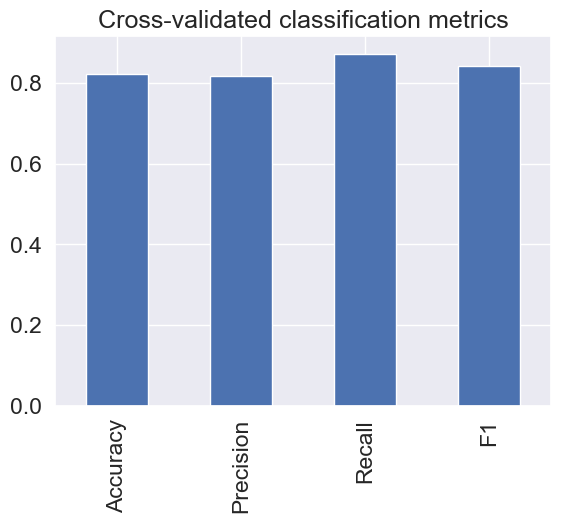

In [58]:
# Visualize cross-validated metrics 
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'F1':cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics', legend=False);

## Feature Importance

Feature importance is another way of asking, 'Which features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for '(Model Name) feature importance'. 

Let's find the feature importance for our LogisticRegression model...

In [60]:
# Fit an instance of LogisticRegression 
clf = LogisticRegression(C=9.236708571873866,
                         solver='liblinear')

clf.fit(X_train, y_train);

In [61]:
# Check coef_
clf.coef_

array([[-1.53978522e-03, -1.69950454e+00,  9.54643771e-01,
        -1.66641045e-02, -4.76784591e-03, -4.69392429e-01,
         6.55521958e-01,  3.57265353e-02, -5.07124275e-01,
        -6.38647517e-01,  2.67242131e-01, -7.57896669e-01,
        -1.14704388e+00]])

In [62]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict 

{'age': np.float64(-0.0015397852169135536),
 'sex': np.float64(-1.6995045407238294),
 'cp': np.float64(0.9546437709247164),
 'trestbps': np.float64(-0.016664104531482284),
 'chol': np.float64(-0.004767845905380102),
 'fbs': np.float64(-0.4693924293089707),
 'restecg': np.float64(0.6555219583369841),
 'thalach': np.float64(0.035726535267407954),
 'exang': np.float64(-0.5071242754121064),
 'oldpeak': np.float64(-0.6386475168201043),
 'slope': np.float64(0.26724213147473685),
 'ca': np.float64(-0.7578966694517709),
 'thal': np.float64(-1.1470438848270492)}

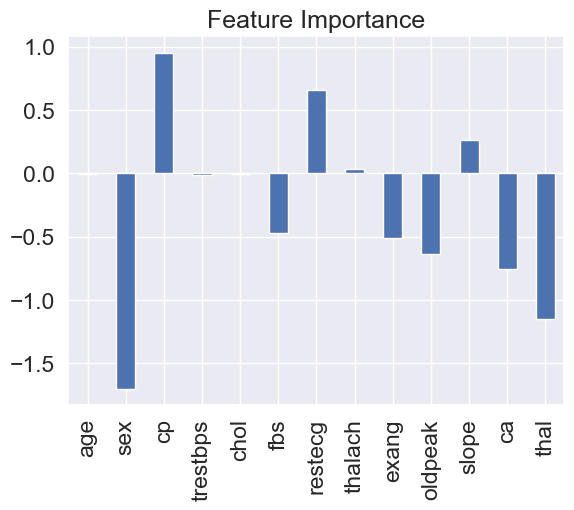

In [63]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [64]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [65]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
